## We define a new benchmark called Torsion Vibration
### Some of the factors why we opted for a noisy function
- It practically mimics the real world scenarious
- It is being used by SMT (Surrogate Modelling ToolBox)
- Julia's surrogate models need some fresh testing on these blackbox functions

In [1]:
# Importing the required packages
using Statistics
using Random
using Plots

In [2]:
# Defining the function
function f(x)
    I, c, k, theta, M = x
    return I * theta[2] + c* theta[1] + k* theta[theta] + M
end

f (generic function with 1 method)

In [4]:
# Generate some sample data
Random.seed!(0)
n_samples = 100
X = rand(n_samples, 5) # Random data in [0,1] range

100×5 Matrix{Float64}:
 0.455238   0.735106   0.554894  0.876059  0.10671
 0.547642   0.993553   0.520638  0.571527  0.170246
 0.773354   0.703694   0.470491  0.975147  0.434921
 0.940585   0.150822   0.207344  0.593887  0.928029
 0.0296477  0.409406   0.206282  0.658747  0.369646
 0.746943   0.864755   0.519913  0.649587  0.804829
 0.746801   0.64608    0.449353  0.889835  0.708753
 0.97667    0.692789   0.749497  0.418847  0.439695
 0.329335   0.254097   0.595936  0.248309  0.797711
 0.672001   0.869579   0.768493  0.997714  0.580796
 ⋮                                         
 0.952265   0.0856596  0.117041  0.391894  0.0981992
 0.587707   0.355338   0.505915  0.130669  0.38595
 0.162728   0.902837   0.35591   0.623287  0.847794
 0.950539   0.52672    0.449993  0.220609  0.426232
 0.3754     0.92438    0.432918  0.891632  0.884604
 0.182714   0.749239   0.3126    0.896482  0.0869468
 0.0392607  0.908511   0.221973  0.83377   0.351491
 0.891591   0.0427439  0.794439  0.295161  0.1932

In [6]:
# Standardizinf the data
X_scaled = (X .- mean(X, dims = 1)) ./ std(X, dims=1)

# Apply non - negative ranges
X_scaled_non_negative = X_scaled .- minimum(X_scaled, dims=1) .+ abs.(minimum(X_scaled, dims=1))

100×5 Matrix{Float64}:
 3.1296   4.21122  3.94171  4.31529  1.92287
 3.44249  5.10771  3.8101   3.35948  2.13371
 4.20676  4.10226  3.61743  4.62629  3.01202
 4.77302  2.18447  2.6064   3.42966  4.64835
 1.68853  3.08144  2.60232  3.63323  2.79541
 4.11733  4.66094  3.80731  3.60448  4.23952
 4.11685  3.90241  3.53621  4.35853  3.9207
 4.8952   4.06443  4.68939  2.88028  3.02786
 2.70329  2.54271  4.0994   2.34503  4.2159
 3.86357  4.67768  4.76237  4.69712  3.49609
 ⋮                                   
 4.81256  1.95844  2.25944  2.79569  1.89463
 3.57815  2.89389  3.75353  1.9758   2.84951
 2.13915  4.79304  3.1772   3.52194  4.3821
 4.80672  3.48838  3.53867  2.25809  2.98318
 2.85927  4.86777  3.47307  4.36417  4.50425
 2.20682  4.26025  3.0108   4.37939  1.85729
 1.72108  4.81272  2.6626   4.18256  2.73516
 4.60712  1.80957  4.86206  2.49208  2.21018
 3.19647  4.3544   3.26286  4.08552  1.95698

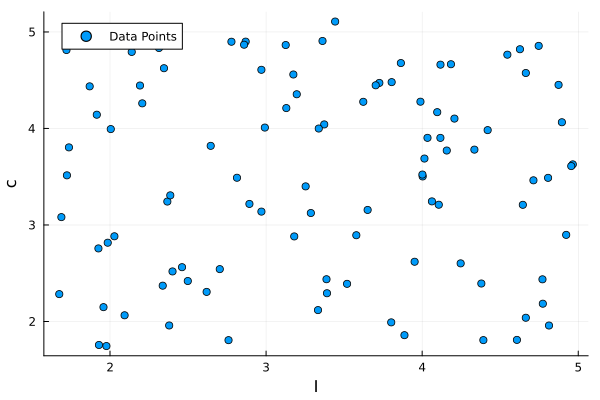

In [7]:
# Plot the data points
scatter(X_scaled_non_negative[:, 1], X_scaled_non_negative[:, 2], xlabel="I", ylabel="c", label="Data Points", legend=:topleft)